# 读取数据

In [143]:
import pandas as pd
from pandas import Series,DataFrame

In [144]:
data = pd.read_csv('./data/housing_with_type.csv')
del data['Unnamed: 0']

In [145]:
data.head()

,district,type,metro_num,S,mon_price,聚类类别
0,徐汇,整租,173.0,42.00,4830,高端房源
1,徐汇,整租,757.0,68.65,5130,高端房源
2,徐汇,整租,236.0,30.37,4690,高端房源
3,徐汇,整租,243.0,49.15,4790,高端房源
4,徐汇,整租,488.0,33.17,4490,高端房源


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Data columns (total 6 columns):
district     14034 non-null object
type         14034 non-null object
metro_num    14034 non-null float64
S            14034 non-null float64
mon_price    14034 non-null int64
聚类类别         14034 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 657.9+ KB


---

# 添加上海各区人口密度作为一个变量

In [147]:
data.district.value_counts().index

Index(['浦东', '宝山', '闵行', '嘉定', '松江', '普陀', '徐汇', '杨浦', '长宁', '闸北', '虹口', '黄浦',
       '青浦', '静安'],
      dtype='object')

### 上海各区人口密度（人/平方公里）

In [148]:
#density = [4523,7465,6845,3378,2906,23491,19889,21657,18044,28609,34501,32190,1804,31089]
#density_Series = Series(density,index=data.district.value_counts().index)

In [149]:
#density_Series
#data.insert(5,'人口密度',density_Series)
data['density']=data['district']

In [150]:
density_shift = {
    '浦东':int(4523),
    '宝山':int(1925),
    '闵行':int(6845),
    '嘉定':int(3378),
    '松江':int(2906),
    '普陀':int(23491),
    '徐汇':int(19889),
    '杨浦':int(21657),
    '长宁':int(18044),
    '闸北':int(28609),
    '虹口':int(34501),
    '黄浦':int(32190),
    '青浦':int(1804),
    '静安':int(31089)
}

In [151]:
data['density'] = data['density'].map(density_shift)
data.head()

,district,type,metro_num,S,mon_price,聚类类别,density
0,徐汇,整租,173.0,42.00,4830,高端房源,19889
1,徐汇,整租,757.0,68.65,5130,高端房源,19889
2,徐汇,整租,236.0,30.37,4690,高端房源,19889
3,徐汇,整租,243.0,49.15,4790,高端房源,19889
4,徐汇,整租,488.0,33.17,4490,高端房源,19889


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Data columns (total 7 columns):
district     14034 non-null object
type         14034 non-null object
metro_num    14034 non-null float64
S            14034 non-null float64
mon_price    14034 non-null int64
聚类类别         14034 non-null object
density      14034 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 767.6+ KB


In [153]:
data = data.drop(12438)
data.describe()

,metro_num,S,mon_price,density
count,14033.000000,14033.000000,14033.000000,14033.000000
mean,813.880567,20.222236,2692.827621,10674.116012
std,505.221161,18.977513,1457.067357,10038.954507
min,18.000000,0.000000,790.000000,1804.000000
25%,418.000000,10.900000,1790.000000,2906.000000
50%,708.000000,13.200000,2290.000000,4523.000000
75%,1126.000000,17.000000,3030.000000,19889.000000
max,2475.000000,163.000000,16230.000000,34501.000000


## 存储到csv

In [154]:
housing = data.copy()

In [200]:
housing.to_csv('./data/shanghai_housing_density.csv')

---

# 数据探索

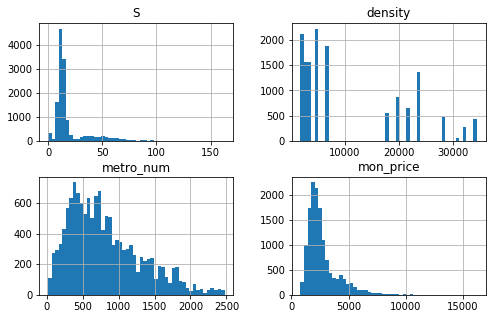

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(8,5))
plt.show()

## 相关性分析

### 查找关联

In [157]:
corr_matrix = housing.corr()

In [158]:
corr_matrix["mon_price"].sort_values(ascending=False)

mon_price    1.000000
S            0.810250
density      0.410529
metro_num   -0.303689
Name: mon_price, dtype: float64

### 散点矩阵

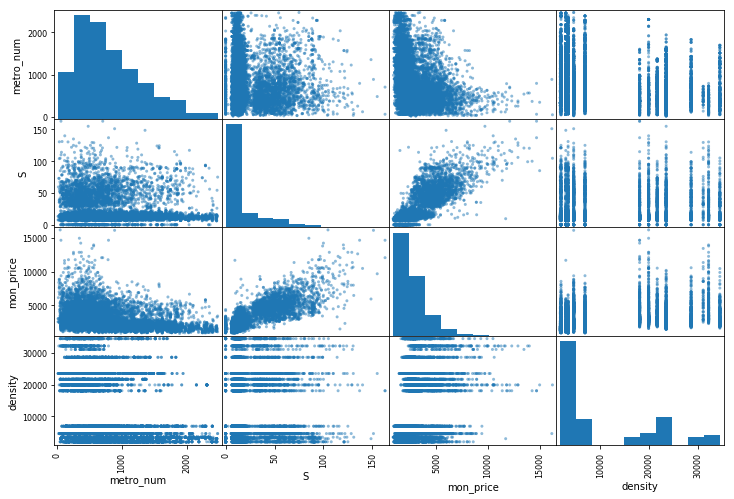

In [159]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
# metro_num S mon_price聚类类别人口密度
attributes = ['metro_num','S','mon_price','density']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

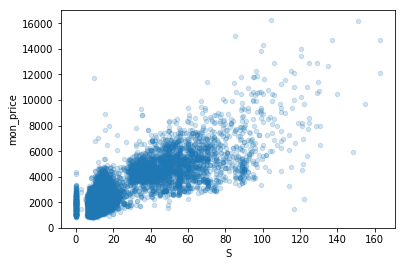

In [160]:
housing.plot(kind="scatter", x="S", y="mon_price",alpha=0.2)
plt.show()

 - **月租价格**与**面积**相关度最大，与**人口密度**有相关性，与**距离地铁站距离**负相关

# 划分训练集和测试集

In [161]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [162]:
#train_set['district'].value_counts()

# 为机器学习算法准备数据

In [163]:
housing_train = train_set.drop("mon_price",axis=1)
housing_train.head()

,district,type,metro_num,S,聚类类别,density
7971,黄浦,合租,72.0,15.0,交通便利普通,32190
11591,松江,合租,652.0,9.5,交通一般普通,2906
4949,嘉定,合租,218.0,8.1,交通便利普通,3378
11527,松江,合租,1352.0,13.2,交通不便普通,2906
8678,闵行,合租,1070.0,14.1,交通一般普通,6845


In [164]:
housing_cat = housing_train[['聚类类别']]
housing_num = housing_train[['metro_num','S','density']]

In [165]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_train = cat_encoder.fit_transform(housing_cat).toarray()
housing_cat_train

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [166]:
cat_encoder.categories_

[array(['交通一般普通', '交通不便普通', '交通便利普通', '豪宅', '高端房源'], dtype=object)]

## 标准化后的数据

In [167]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

housing_num_train = std_scaler.fit_transform(housing_num)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\13626\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [168]:
housing_num_train

array([[-1.46991225, -0.27189234,  2.13633444],
       [-0.32058467, -0.56252742, -0.77619173],
       [-1.18059875, -0.63650726, -0.72924759],
       ...,
       [-0.74266531, -0.02353145, -0.77619173],
       [-0.95271484,  3.65802243, -0.61536825],
       [-0.20367031, -0.29831371, -0.87375997]])

In [169]:
#std_scaler.inverse_transform(housing_num_train,copy=True)
# 反标准化

## 准备好的训练数据

In [170]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["聚类类别"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_train)
#housing_prepared
housing_test = full_pipeline.fit_transform(housing_test)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\13626\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\13626\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\13626\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [171]:
#std_scaler.inverse_transform(housing_num_train,copy=True)
# 反标准化
price_label = train_set['mon_price'].values
price_label

array([3960, 1330, 1890, ..., 1960, 7790, 2090], dtype=int64)

In [172]:
housing_prepared.shape

(11226, 8)

In [173]:
price_label.shape

(11226,)

# 线性回归模型

In [174]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, price_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 误差检验

计算回归模型的**RMSE**

In [175]:
from sklearn.metrics import mean_squared_error
import numpy as np

price_pred_lin = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(price_label, price_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

619.4860434771081

线性回归模型误差约为：**621.4**

---

# 决策树模型

In [176]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, price_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

### 误差检验

In [177]:
price_pred_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(price_label, price_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

57.754200691567966

决策树模型误差仅仅为：**57.68**???

很大可能是**过拟合**了

### 交叉验证

In [178]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, price_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [179]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [555.42821264 531.52694315 580.31122342 578.67256075 516.70837781
 574.19652582 595.41050307 584.89648979 611.0328102  678.94743653]
Mean: 580.7131083188319
Standard deviation: 42.43204351633885


交叉验证平均误差：**577.89**

---

# 随机森林

In [180]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, price_label)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [181]:
price_pred_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(price_label, price_pred_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

208.51535914693386

同样判断为模型**过拟合**了

### 交叉验证

In [182]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, price_label,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [434.71351398 445.15553872 443.32067289 449.21180069 414.23841679
 510.592366   510.24339457 487.70141699 459.18825559 603.27791325]
Mean: 475.76432894790594
Standard deviation: 52.19569472820684


交叉验证平均误差：**479.76**

**随机森林效果最好。**

解决过拟合可以通过**简化模型**，给模型加限制（**规整化**），或**用更多的训练数据**。

---

# 基于最优模型的参数微调

In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, price_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

### 获取最优参数

In [184]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

### 显示全部参数和结果

In [185]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [186]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

513.782573995441 {'max_features': 2, 'n_estimators': 3}
464.75789280396117 {'max_features': 2, 'n_estimators': 10}
454.11048361206787 {'max_features': 2, 'n_estimators': 30}
504.80391277147385 {'max_features': 4, 'n_estimators': 3}
465.52816089720807 {'max_features': 4, 'n_estimators': 10}
456.4616234634778 {'max_features': 4, 'n_estimators': 30}
508.23321303115705 {'max_features': 6, 'n_estimators': 3}
468.42782695338843 {'max_features': 6, 'n_estimators': 10}
456.7671034691555 {'max_features': 6, 'n_estimators': 30}
521.0781528922561 {'max_features': 8, 'n_estimators': 3}
481.84739751238715 {'max_features': 8, 'n_estimators': 10}
469.1520653376667 {'max_features': 8, 'n_estimators': 30}
497.87026981440385 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
473.0609512013673 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
510.9051519346628 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
472.6190988407387 {'bootstrap': False, 'max_features': 3, 'n_estimato

**max_features: 2**, **n_estimators: 30**时效果最好，此时模型误差为**451.98**

### 将参数返回到随机森林模型中

In [187]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_modified = RandomForestRegressor(max_features=2, n_estimators=30,random_state=42)
forest_reg_modified.fit(housing_prepared, price_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [188]:
price_pred_forest_modified = forest_reg_modified.predict(housing_prepared)
forest_mse_modified = mean_squared_error(price_label, price_pred_forest_modified)
forest_rmse_modified = np.sqrt(forest_mse_modified)
forest_rmse_modified

183.35075180410323

In [189]:
from sklearn.model_selection import cross_val_score

forest_scores_modified = cross_val_score(forest_reg_modified, housing_prepared, price_label,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores_modified = np.sqrt(-forest_scores_modified)
display_scores(forest_rmse_scores_modified)

Scores: [414.94466976 443.17697655 430.17832777 426.95750187 408.65433561
 481.16576524 483.71085492 441.59360514 447.76356579 526.44574731]
Mean: 450.45913499792533
Standard deviation: 34.54560638929374


**参数调整后误差降低了**

---

## 查看各变量的重要度

In [190]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0882774 , 0.40455893, 0.13719809, 0.0319085 , 0.02164429,
       0.02681525, 0.18520118, 0.10439636])

In [191]:
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.40455893315529806, 'S'),
 (0.18520117545360623, '豪宅'),
 (0.1371980899673283, 'density'),
 (0.10439636016140152, '高端房源'),
 (0.08827740227488713, 'metro_num'),
 (0.0319085018586704, '交通一般普通'),
 (0.02681524689603492, '交通便利普通'),
 (0.02164429023277349, '交通不便普通')]

### 变量重要性分析

- **房源面积**对月租金有着极大的影响度。

- 类型为**豪宅**和**高端房源**的房源月租金往往都会比较高。

- **人口密度**（即：**不同管辖区/商区**）对月租金影响较大。人口密度更大的**区**，房源租金会更大。

- **与地铁的距离**（即：**交通属性**）一定程度上影响月租金价格。

---

# 模型在测试集上的表现

In [193]:
housing_test = test_set.drop("mon_price",axis=1)
housing_test.head()

,district,type,metro_num,S,聚类类别,density
353,闵行,整租,791.0,38.0,高端房源,6845
13561,宝山,合租,1163.0,12.0,交通一般普通,1925
12971,长宁,合租,716.0,11.2,交通便利普通,18044
11094,嘉定,合租,1047.0,11.8,交通一般普通,3378
8192,青浦,合租,960.0,14.8,交通一般普通,1804


In [197]:
#price_label_test = test_set['mon_price'].values
#price_label_test

In [198]:
final_model = grid_search.best_estimator_

housing_test_x = test_set.drop("mon_price", axis=1)
housing_test_y = test_set['mon_price'].copy()

housing_test_prepared = full_pipeline.transform(housing_test_x)
final_predictions = final_model.predict(housing_test_prepared)

final_mse = mean_squared_error(housing_test_y, final_predictions)
final_rmse = np.sqrt(final_mse)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [199]:
final_rmse

443.06423447086684

可以看出，**训练集**与**测试集**上的验证误差**很接近**，训练得到的模型在测试集上的表现也很好，模型拟合较好。

---